In [21]:
import zarr
import numpy as np
import matplotlib.pyplot as plt
import torch
import pickle
from pathlib import Path
from tqdm import tqdm

# Import utility function for concatenating the robot state
from furniture_bench.robot.robot_state import filter_and_concat_robot_state, ROBOT_STATES, ROBOT_STATE_DIMS
from src.data.utils import zipped_img_generator

In [2]:
def print_stats(data):
    print(f"min: {np.min(data)}, max: {np.max(data)}, mean: {np.mean(data)}, std: {np.std(data)}")


def make_hist(data, title=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title)

    ax1.hist(data, bins=100)
    ax1.set_title("Linear scale")

    ax2.hist(data, bins=100, log=True)
    ax2.set_title("Log scale")

## Look at the robot_state data in the raw sim data

In [3]:
root = Path("/data/scratch/ankile/furniture-data/data/raw/sim/image")
pickle_files = list(root.rglob("*.pkl"))

len(pickle_files)

494

In [4]:
robot_states = []

for file in tqdm(pickle_files):
    with open(file, "rb") as f:
        data = pickle.load(f)
    robot_states.extend([filter_and_concat_robot_state(o["robot_state"]) for o in data["observations"]])

100%|██████████| 494/494 [01:21<00:00,  6.08it/s]


In [5]:
robot_states = np.array(robot_states)

In [10]:
# Make the x-axis labels
labels = []

for state in ROBOT_STATES:
    for dim in range(ROBOT_STATE_DIMS[state]):
        labels.append(f"{state}_{dim}")

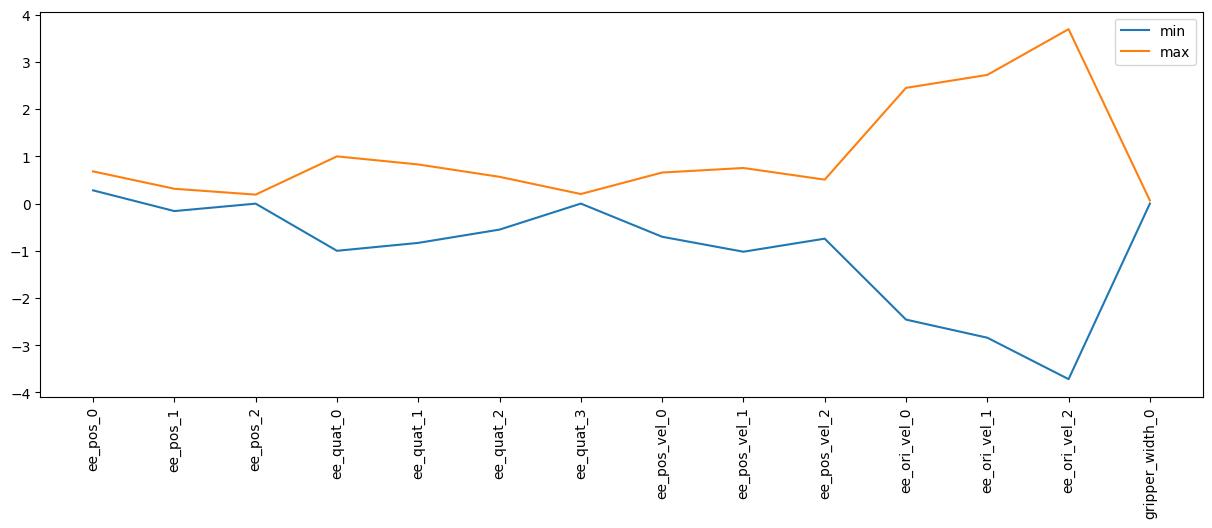

In [11]:
# Plot the min and the max across the robot states
fig, ax1 = plt.subplots(1, 1, figsize=(15, 5))

ax1.plot(np.min(robot_states, axis=0))
ax1.plot(np.max(robot_states, axis=0))
ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels, rotation=90)
ax1.legend(["min", "max"])

In [14]:
# Look at min and max for gripper width
np.min(robot_states[:, -1], axis=0), np.max(robot_states[:, -1], axis=0)

(4.7516914e-05, 0.065)

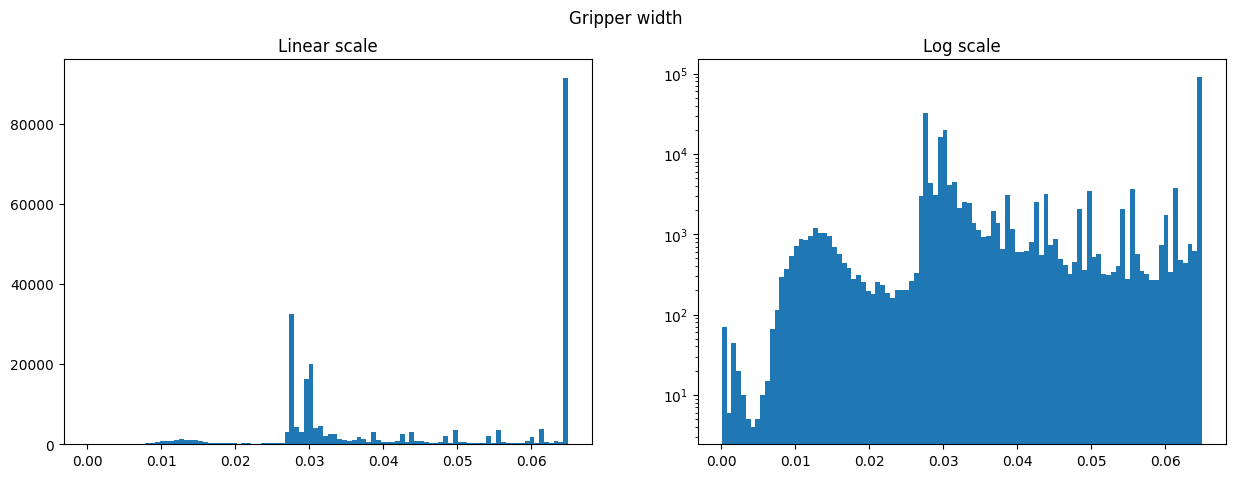

In [15]:
# Make histogram for gripper width
make_hist(robot_states[:, -1], title="Gripper width")

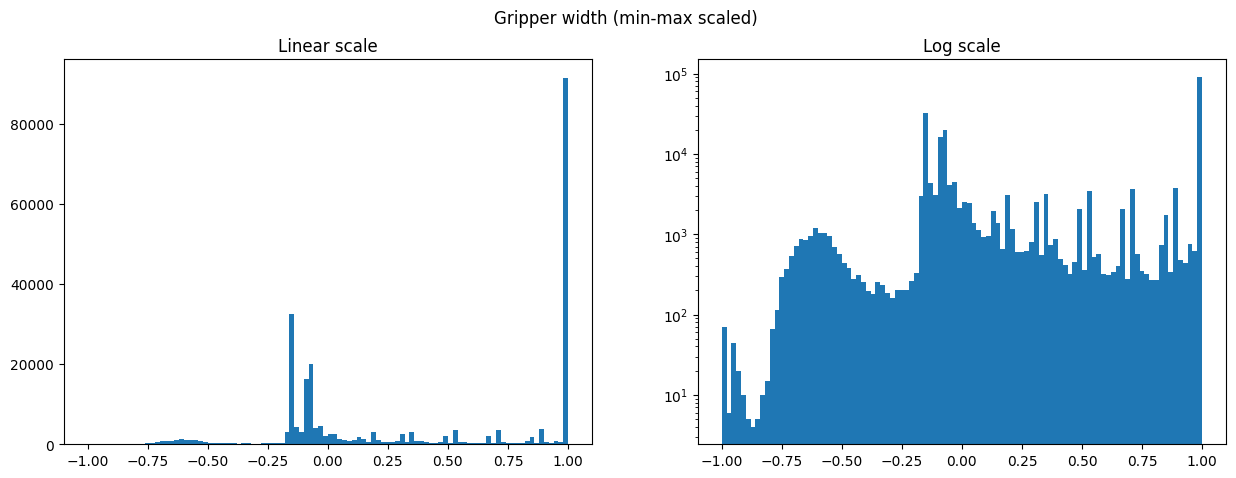

In [18]:
# MinMax scale [-1, 1] the gripper width and make histogram
gripper_width = robot_states[:, -1]
gripper_width = (gripper_width - np.min(gripper_width)) / (np.max(gripper_width) - np.min(gripper_width))
gripper_width = gripper_width * 2 - 1

make_hist(gripper_width, title="Gripper width (min-max scaled)")

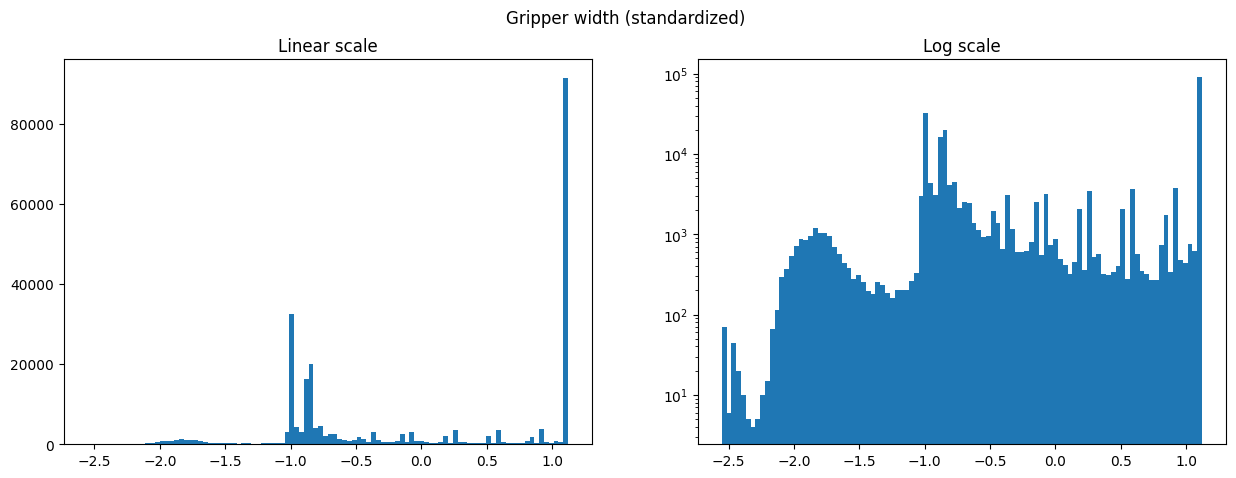

In [19]:
# Standardize the gripper width and make histogram
gripper_width = robot_states[:, -1]
gripper_width = (gripper_width - np.mean(gripper_width)) / np.std(gripper_width)

make_hist(gripper_width, title="Gripper width (standardized)")

## Look at the robot_state data in the raw real data

In [ ]:
zipped_img_generator